<a href="https://colab.research.google.com/github/qtpi314/Music-Suggestions/blob/main/Music_Suggestions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction: How Do Streaming Music Services Know What to Recommend?

Streaming music services have been around for about 20 years. The first - Napster was founded in 1999. It originated as a free peer to peer file sharing service that emphasized digital audio.  It was discontinued in 2001 over legal issues and copyright infringment and was later reinvented as a subscription or pay-per-song service. Since then many others have emerged including Pandora(US 2000) a streaming radio service similar to Sirius XM Radio,  Deezer(France 2007), SoundCloud(Germany 2007), Amazon Prime Music (US 2007), Spotify(Sweden 2008), Tidal (Norway 2014) and Apple Music(2015).

With so many options for consumers to choose from, these streaming services began to incorporate song recommendation algorithms. Some are based soley on user behavior (Pandora), playing songs that are similar and adjusting the choices based on whether the user "likes", "dislikes", or skips the track. Others not only incorporate user behavior but also use their own analysis of tracks, top 10 ratings, etc. Spotify is the leader in the industry in this regard and have developed their own algorithm and analysis of tracks using up to 13 different attributes their machine learning algorithm assigns to each track.

This information is available in a public dataset from Kaggle called, Spotify Dataset 1921-2020. The link can be found [here](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data.csv). This dataset contains over 160,000 tracks with many different attributes that Spotify uses to suggest songs similar to what the user is listening to. Access to this information can also be found and used through the Spotify web API for developers.



# Research Question:
My goal for this project is to understand how Spotify analyzes song tracks and uses that information to make recommendations in the form of playlists for users to discover new music they might not otherwise hear or be exposed to. I will use this information to develop my own model for song grouping and recommendations.

# The Data:
As mentioned above, the data comes from a public dataset from Kaggle with over 160,000 tracks. It contains information on 13 different attributes or features that Spotify's Audio Analysis (available through their Web API) uses to describe the track's structure and musical content, including rhythm, pitch, and timbre. Most of the attribute scores are in the form of a confidence value between 0.0 and 1.0 which indicates the reliability of the attribute. Small confidence values should be considered speculative. The attributes, along with other features in the dataset are described below:

* Acousticness - A confidence value indicating whether the track is acoustic.   
* Artists - Name of artist(s)
* Danceability - A confidence value describing how suitable a track is for dancing based on musical elements including tempo, rhythm stability, beat strength and regularity.
* Duration_ms - Integer of how many milliseconds the track is (usually between 200k and 300k
* Energy - A confidence value representing a measure of intensity and activity. Features that contribute to this attribute are dynamic range, precieved loudness, timbre, onset rate, and general entropy.
* Explicit - A binary variable indicating explicit content (0 = No explicit content, 1 = explicit content)
* ID - ID number that Spotify assigns to each track.
* Instrumentalness - A confidence value that predicts the presence of vocals. ("Oohs" and "Aahs" are treated as instrumental) Values above 0.5 are considered instrumental tracks
* Key - Values range from 0 to 11 to indicate the key a composition is in (C is 0, C# as 1 and so on with B as 11)
* Liveness - A confidence value indicating the probability that the track is a live recording. 0.8 and above is a strong likelihood that the track is live.
* Loudness - Measure of the overall loudness of a track in decibels (dB). Values range from -60 to 0.
* Mode - A binary variable indicating whether the track is in a major or minor key (0 for minor, 1 for major)
* Name - Song Title
* Popularity - A value between 0 and 100 indicating the popularity of the artist. It is calculated from the popularity of all the artist's tracks.
* Release_date - release date of a track mostly in yyyy-mm-dd format.
* Speechiness - A confidence value indicating the presence of spoken word in a track. Talk shows, audio books, and poetry are closer to 1.0. Anything above 0.66 is considered entirely spoken. Values between 0.33 and 0.66 contain both music and speech either in sections or layered (rap music). Values below 0.33 are mostly music only.
* Tempo - Indicates the overall tempo of the track in beats per minute (BPM). Values range from 50 to 150.
* Valence - A confidence value describing the positiveness conveyed by a track. Higher values indicate tracks that sound more positive (happy, cheerful, euphoric) while lower values sound more negative (sad, depressed, angry)
* Year - Release year ranging from 1921-2020

I merged this with another file which was organized by artists and contained the genres each artist's music was a part of. Some had multiple so I only used the first one in the list.

The merged dataset was too large to do any sort of analysis on. I narrowed it down by only using artists that were ranked 50 or above in popularity. This left me with 38,340 observations and allowed me narrowed down the data to the most relevant for my project and made it a manageable size for me to do my analysis without crashing the runtime session.

## Load the Data

In [ ]:
!wget https://github.com/qtpi314/some_data/raw/master/670134_1261707_bundle_archive.zip

--2020-07-29 14:06:42--  https://github.com/qtpi314/some_data/raw/master/670134_1261707_bundle_archive.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qtpi314/some_data/master/670134_1261707_bundle_archive.zip [following]
--2020-07-29 14:06:43--  https://raw.githubusercontent.com/qtpi314/some_data/master/670134_1261707_bundle_archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17769926 (17M) [application/zip]
Saving to: ‘670134_1261707_bundle_archive.zip’

670134_1261707_bund 100%[===================>]  16.95M  26.7MB/s    in 0.6s    

2020-07-29 14:06:43 (26.7 MB/s) - ‘670134_1261707_bun

In [ ]:
!unzip -n 670134_1261707_bundle_archive.zip

Archive:  670134_1261707_bundle_archive.zip
  inflating: data.csv                
  inflating: data_by_artist.csv      
  inflating: data_by_genres.csv      
  inflating: data_by_year.csv        
  inflating: data_w_genres.csv       
  inflating: super_genres.json       


## Load Appropriate Libraries

In [ ]:
!pip install umap-learn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
!pip install colorcet
import colorcet as cc
!pip install hdbscan
import hdbscan

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 4.7MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2305940 sha256=df2bd46ddf2883040b4319238ee79be2a3f3edc96cf58e38834be406d81c705e
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


# Data Cleaning and Exploration

First I loaded the data.csv file which was organized by tracks and had over 169,000 observations. I also loaded the data_w_genres.csv file which was organized by artists and contained information on the genres. Neither file showed any missing data, however, some of the genres in the second file were saved as '[]'. I changed it to '[None]' so it would be more clear.

The artists were saved as strings in both files, however in the file organized by tracks, some had multiple artists. For example, if there was a recording of the Symphony No. 8 in F Major, Op. 93: III. Tempo di menuetto by Lugwig van Beethoven, performed by the New York Philharmonic, under the direction of Leonard Bernstein, the entry for artists was recorded as '[Lugwig van Beethoven, New York Philharmonic, Leonard Bernstein]'. I separated them out and saved them as a list of artists. Then I created a column of just the first artist in the list and merged the two sets on that feature.

After I merged the two sets, I decided to do the same thing with the list of genres and created another feature that listed only the first genre. This left me with 169,897 observations. This set was still too large to work with so I decided to only use artists that were ranked 50 or above out of 100. This made my dataset smaller and more manageable while retaining the most relevant data to the majority of the population with 38,480 observations to still work with.

I created a matrix of scatter plots using all the numerical data to see if any patterns or correlations existed. My description of my findings can be found below.

In [ ]:
#load the data set (organized by tracks)
music_df = pd.read_csv('data.csv')
music_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [ ]:
#load genre dataset (organized by artist)
genres_df = pd.read_csv('data_w_genres.csv')

In [ ]:
genres_df

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27616,鳳飛飛,0.884000,0.358000,259387.000000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,35.000000,10,1,2,"['c-pop', 'classic mandopop', 'vintage chinese..."
27617,黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,47.000000,9,0,2,"['c-pop', 'classic cantopop', 'classic mandopop']"
27618,黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,20.000000,5,1,11,[]
27619,黃蜀娟,0.925143,0.322262,212989.857143,0.141490,0.000189,0.196757,-19.256714,0.055571,111.685381,0.267033,23.000000,10,1,42,[]


In [ ]:
genres_df.info()
#no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           27621 non-null  object 
 1   acousticness      27621 non-null  float64
 2   danceability      27621 non-null  float64
 3   duration_ms       27621 non-null  float64
 4   energy            27621 non-null  float64
 5   instrumentalness  27621 non-null  float64
 6   liveness          27621 non-null  float64
 7   loudness          27621 non-null  float64
 8   speechiness       27621 non-null  float64
 9   tempo             27621 non-null  float64
 10  valence           27621 non-null  float64
 11  popularity        27621 non-null  float64
 12  key               27621 non-null  int64  
 13  mode              27621 non-null  int64  
 14  count             27621 non-null  int64  
 15  genres            27621 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [ ]:
genres_df['genres'].value_counts()

[]                                                                                                                              9530
['movie tunes']                                                                                                                   78
['show tunes']                                                                                                                    63
['classical piano']                                                                                                               57
['sleep']                                                                                                                         56
                                                                                                                                ... 
['ambient', 'chamber psych', 'compositional ambient', 'drift', 'drone', 'focus', 'neo-classical', 'post-rock', 'warm drone']       1
['hip hop', 'hip house', 'mexican electronic', 'new jack swing', 'rap

In [ ]:
genres_df['genres']=genres_df['genres'].replace('[]', "['None']")
genres_df['genres'].value_counts()

['None']                                                                                                                        9530
['movie tunes']                                                                                                                   78
['show tunes']                                                                                                                    63
['classical piano']                                                                                                               57
['sleep']                                                                                                                         56
                                                                                                                                ... 
['progressive psytrance']                                                                                                          1
['ambient', 'chamber psych', 'compositional ambient', 'drift', 'drone

In [ ]:
music_df.info()
#no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [ ]:
#drop columns we don't need like spotify id and release date
cleaned_music=music_df.drop(columns=['id','release_date'], axis=1)

In [ ]:
cleaned_music['artists_as_list'] = cleaned_music['artists'].apply(eval)

In [ ]:
cleaned_music

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,[Carl Woitschach]
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,"[Robert Schumann, Vladimir Horowitz]"
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,[Seweryn Goszczyński]
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,[Francisco Canaro]
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,"[Frédéric Chopin, Vladimir Horowitz]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020,"[DripReport, Tyga]"
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020,"[Leon Bridges, Terrace Martin]"
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020,"[Kygo, Oh Wonder]"
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020,"[Cash Cash, Andy Grammer]"


In [ ]:
cleaned_music['first_artist'] = cleaned_music['artists_as_list'].apply(lambda row: row[0])

In [ ]:
music_and_genres=pd.merge(cleaned_music, genres_df[['artists', 'genres']], left_on='first_artist', right_on='artists')
music_and_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169897 entries, 0 to 169896
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169897 non-null  float64
 1   artists_x         169897 non-null  object 
 2   danceability      169897 non-null  float64
 3   duration_ms       169897 non-null  int64  
 4   energy            169897 non-null  float64
 5   explicit          169897 non-null  int64  
 6   instrumentalness  169897 non-null  float64
 7   key               169897 non-null  int64  
 8   liveness          169897 non-null  float64
 9   loudness          169897 non-null  float64
 10  mode              169897 non-null  int64  
 11  name              169897 non-null  object 
 12  popularity        169897 non-null  int64  
 13  speechiness       169897 non-null  float64
 14  tempo             169897 non-null  float64
 15  valence           169897 non-null  float64
 16  year              16

In [ ]:
music_and_genres_top50 = music_and_genres[music_and_genres['popularity'].isin([x for x in range(50,100)])]
music_and_genres_top50

,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres
139,0.9950,"['Robert Schumann', 'Ivan Moravec']",0.500,186840,0.0123,0,0.954000,5,0.0748,-30.170,1,"Kinderszenen, Op. 15: No. 7 in F Major, Träumerei",58,0.0712,130.128,0.3130,1989,"[Robert Schumann, Ivan Moravec]",Robert Schumann,Robert Schumann,"['classical', 'early romantic era']"
2616,0.9920,"['Frédéric Chopin', 'Maurizio Pollini']",0.261,286987,0.0149,0,0.897000,1,0.1020,-27.528,1,"Nocturne No.1 In B Flat Minor, Op.9 No.1",53,0.0419,75.296,0.0382,2005,"[Frédéric Chopin, Maurizio Pollini]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl..."
2617,0.9890,"['Frédéric Chopin', 'Gabriela Montero']",0.359,338253,0.0323,0,0.910000,1,0.0938,-24.408,1,"Chopin: Nocturne No. 8 in D-Flat Major, Op. 27...",53,0.0377,107.169,0.0728,2005,"[Frédéric Chopin, Gabriela Montero]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl..."
2618,0.9910,"['Frédéric Chopin', 'Khatia Buniatishvili']",0.314,199773,0.0157,0,0.916000,1,0.1340,-36.252,0,"Waltz in C-Sharp Minor, Op. 64 No. 2",58,0.0356,95.890,0.0939,2012,"[Frédéric Chopin, Khatia Buniatishvili]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl..."
2662,0.9880,"['Frédéric Chopin', 'Hélène Grimaud']",0.319,292547,0.0712,0,0.905000,1,0.1410,-26.415,1,"Berceuse In D Flat, Op.57",51,0.0379,95.365,0.0835,2010,"[Frédéric Chopin, Hélène Grimaud]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169892,0.0490,"['BRELAND', 'Sam Hunt']",0.753,159889,0.5030,0,0.000000,2,0.1500,-6.213,1,My Truck (feat. Sam Hunt) - Remix,66,0.0406,136.892,0.6480,2020,"[BRELAND, Sam Hunt]",BRELAND,BRELAND,['None']
169893,0.0946,['Joel Corry'],0.697,190955,0.9210,0,0.000019,5,0.1590,-4.283,1,Lonely,81,0.0424,123.988,0.7220,2020,[Joel Corry],Joel Corry,Joel Corry,"['deep groove house', 'house', 'tropical house..."
169894,0.1390,"['Savage Ga$p', '93FEETOFSMOKE', 'shinigami']",0.816,148140,0.5770,0,0.000000,1,0.0827,-5.998,1,Pumpkins Scream In the Dead of Night (feat. sh...,68,0.4100,171.028,0.4590,2020,"[Savage Ga$p, 93FEETOFSMOKE, shinigami]",Savage Ga$p,Savage Ga$p,"['dark trap', 'emo rap', 'meme rap']"
169895,0.0265,['Money Man'],0.842,160952,0.7150,1,0.055400,2,0.0831,-6.030,1,24,65,0.0913,126.022,0.4280,2020,[Money Man],Money Man,Money Man,"['atl trap', 'rap', 'southern hip hop', 'trap']"


In [ ]:
music_and_genres_top50['genres_as_list'] = music_and_genres_top50['genres'].apply(eval)
music_and_genres_top50['first_genre'] = music_and_genres_top50['genres_as_list'].apply(lambda row: row[0])
music_and_genres_top50

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres,genres_as_list,first_genre
139,0.9950,"['Robert Schumann', 'Ivan Moravec']",0.500,186840,0.0123,0,0.954000,5,0.0748,-30.170,1,"Kinderszenen, Op. 15: No. 7 in F Major, Träumerei",58,0.0712,130.128,0.3130,1989,"[Robert Schumann, Ivan Moravec]",Robert Schumann,Robert Schumann,"['classical', 'early romantic era']","[classical, early romantic era]",classical
2616,0.9920,"['Frédéric Chopin', 'Maurizio Pollini']",0.261,286987,0.0149,0,0.897000,1,0.1020,-27.528,1,"Nocturne No.1 In B Flat Minor, Op.9 No.1",53,0.0419,75.296,0.0382,2005,"[Frédéric Chopin, Maurizio Pollini]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical
2617,0.9890,"['Frédéric Chopin', 'Gabriela Montero']",0.359,338253,0.0323,0,0.910000,1,0.0938,-24.408,1,"Chopin: Nocturne No. 8 in D-Flat Major, Op. 27...",53,0.0377,107.169,0.0728,2005,"[Frédéric Chopin, Gabriela Montero]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical
2618,0.9910,"['Frédéric Chopin', 'Khatia Buniatishvili']",0.314,199773,0.0157,0,0.916000,1,0.1340,-36.252,0,"Waltz in C-Sharp Minor, Op. 64 No. 2",58,0.0356,95.890,0.0939,2012,"[Frédéric Chopin, Khatia Buniatishvili]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical
2662,0.9880,"['Frédéric Chopin', 'Hélène Grimaud']",0.319,292547,0.0712,0,0.905000,1,0.1410,-26.415,1,"Berceuse In D Flat, Op.57",51,0.0379,95.365,0.0835,2010,"[Frédéric Chopin, Hélène Grimaud]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169892,0.0490,"['BRELAND', 'Sam Hunt']",0.753,159889,0.5030,0,0.000000,2,0.1500,-6.213,1,My Truck (feat. Sam Hunt) - Remix,66,0.0406,136.892,0.6480,2020,"[BRELAND, Sam Hunt]",BRELAND,BRELAND,['None'],[None],None
169893,0.0946,['Joel Corry'],0.697,190955,0.9210,0,0.000019,5,0.1590,-4.283,1,Lonely,81,0.0424,123.988,0.7220,2020,[Joel Corry],Joel Corry,Joel Corry,"['deep groove house', 'house', 'tropical house...","[deep groove house, house, tropical house, uk ...",deep groove house
169894,0.1390,"['Savage Ga$p', '93FEETOFSMOKE', 'shinigami']",0.816,148140,0.5770,0,0.000000,1,0.0827,-5.998,1,Pumpkins Scream In the Dead of Night (feat. sh...,68,0.4100,171.028,0.4590,2020,"[Savage Ga$p, 93FEETOFSMOKE, shinigami]",Savage Ga$p,Savage Ga$p,"['dark trap', 'emo rap', 'meme rap']","[dark trap, emo rap, meme rap]",dark trap
169895,0.0265,['Money Man'],0.842,160952,0.7150,1,0.055400,2,0.0831,-6.030,1,24,65,0.0913,126.022,0.4280,2020,[Money Man],Money Man,Money Man,"['atl trap', 'rap', 'southern hip hop', 'trap']","[atl trap, rap, southern hip hop, trap]",atl trap


Text(0.5, 0, 'Valence')

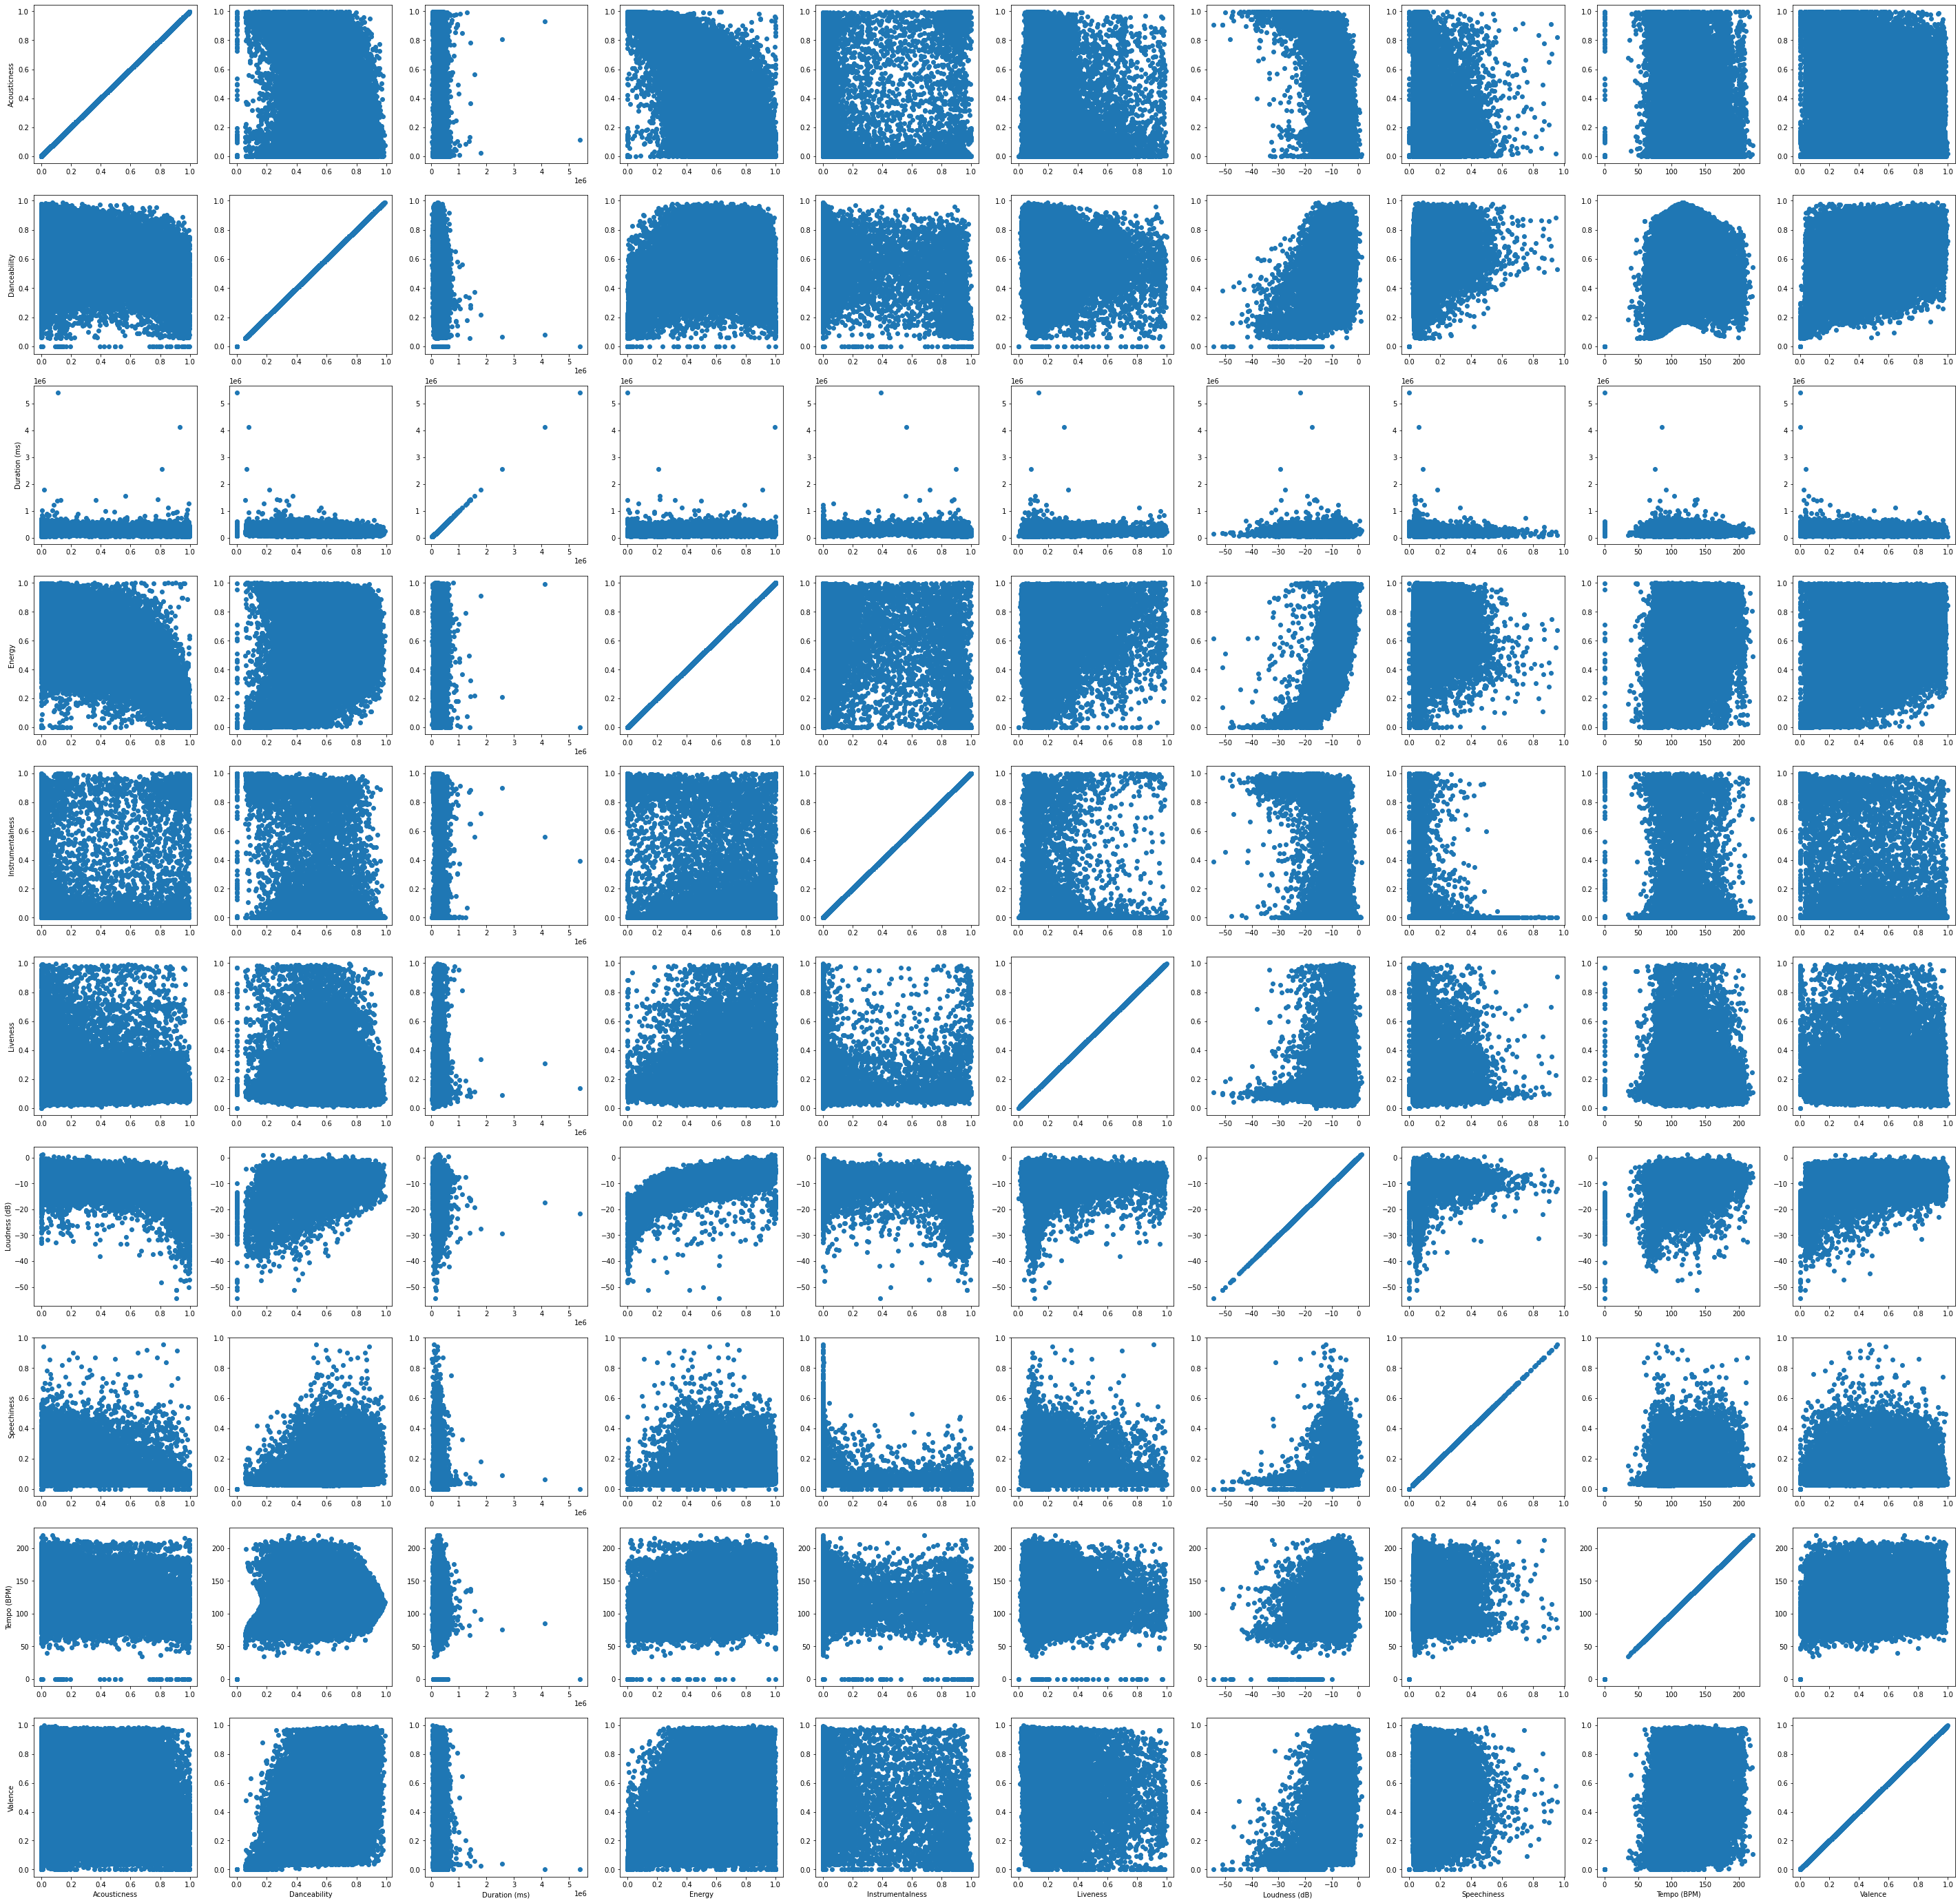

In [ ]:
#make a scatter plot matrix
plt.figure(figsize=(50,50))

#Row 1: Acousticness
plt.subplot(10,10,1)
plt.scatter(x=music_and_genres_top50['acousticness'], y=music_and_genres_top50['acousticness'])
plt.ylabel('Acousticness')

plt.subplot(10,10,2)
plt.scatter(x=music_and_genres_top50['danceability'], y=music_and_genres_top50['acousticness'])

plt.subplot(10,10,3)
plt.scatter(x=music_and_genres_top50['duration_ms'], y=music_and_genres_top50['acousticness'])

plt.subplot(10,10,4)
plt.scatter(x=music_and_genres_top50['energy'], y=music_and_genres_top50['acousticness'])

plt.subplot(10,10,5)
plt.scatter(x=music_and_genres_top50['instrumentalness'], y=music_and_genres_top50['acousticness'])

plt.subplot(10,10,6)
plt.scatter(x=music_and_genres_top50['liveness'], y=music_and_genres_top50['acousticness'])

plt.subplot(10,10,7)
plt.scatter(x=music_and_genres_top50['loudness'], y=music_and_genres_top50['acousticness'])

plt.subplot(10,10,8)
plt.scatter(x=music_and_genres_top50['speechiness'], y=music_and_genres_top50['acousticness'])

plt.subplot(10,10,9)
plt.scatter(x=music_and_genres_top50['tempo'], y=music_and_genres_top50['acousticness'])

plt.subplot(10,10,10)
plt.scatter(x=music_and_genres_top50['valence'], y=music_and_genres_top50['acousticness'])

#Row 2: Danceability

plt.subplot(10,10,11)
plt.scatter(x=music_and_genres_top50['acousticness'], y=music_and_genres_top50['danceability'])
plt.ylabel('Danceability')

plt.subplot(10,10,12)
plt.scatter(x=music_and_genres_top50['danceability'], y=music_and_genres_top50['danceability'])

plt.subplot(10,10,13)
plt.scatter(x=music_and_genres_top50['duration_ms'], y=music_and_genres_top50['danceability'])

plt.subplot(10,10,14)
plt.scatter(x=music_and_genres_top50['energy'], y=music_and_genres_top50['danceability'])

plt.subplot(10,10,15)
plt.scatter(x=music_and_genres_top50['instrumentalness'], y=music_and_genres_top50['danceability'])

plt.subplot(10,10,16)
plt.scatter(x=music_and_genres_top50['liveness'], y=music_and_genres_top50['danceability'])

plt.subplot(10,10,17)
plt.scatter(x=music_and_genres_top50['loudness'], y=music_and_genres_top50['danceability'])

plt.subplot(10,10,18)
plt.scatter(x=music_and_genres_top50['speechiness'], y=music_and_genres_top50['danceability'])

plt.subplot(10,10,19)
plt.scatter(x=music_and_genres_top50['tempo'], y=music_and_genres_top50['danceability'])

plt.subplot(10,10,20)
plt.scatter(x=music_and_genres_top50['valence'], y=music_and_genres_top50['danceability'])

#Row 3: Duration (ms)
plt.subplot(10,10,21)
plt.scatter(x=music_and_genres_top50['acousticness'], y=music_and_genres_top50['duration_ms'])
plt.ylabel('Duration (ms)')

plt.subplot(10,10,22)
plt.scatter(x=music_and_genres_top50['danceability'], y=music_and_genres_top50['duration_ms'])

plt.subplot(10,10,23)
plt.scatter(x=music_and_genres_top50['duration_ms'], y=music_and_genres_top50['duration_ms'])

plt.subplot(10,10,24)
plt.scatter(x=music_and_genres_top50['energy'], y=music_and_genres_top50['duration_ms'])

plt.subplot(10,10,25)
plt.scatter(x=music_and_genres_top50['instrumentalness'], y=music_and_genres_top50['duration_ms'])

plt.subplot(10,10,26)
plt.scatter(x=music_and_genres_top50['liveness'], y=music_and_genres_top50['duration_ms'])

plt.subplot(10,10,27)
plt.scatter(x=music_and_genres_top50['loudness'], y=music_and_genres_top50['duration_ms'])

plt.subplot(10,10,28)
plt.scatter(x=music_and_genres_top50['speechiness'], y=music_and_genres_top50['duration_ms'])

plt.subplot(10,10,29)
plt.scatter(x=music_and_genres_top50['tempo'], y=music_and_genres_top50['duration_ms'])

plt.subplot(10,10,30)
plt.scatter(x=music_and_genres_top50['valence'], y=music_and_genres_top50['duration_ms'])

#Row 4: Energy
plt.subplot(10,10,31)
plt.scatter(x=music_and_genres_top50['acousticness'], y=music_and_genres_top50['energy'])
plt.ylabel('Energy')

plt.subplot(10,10,32)
plt.scatter(x=music_and_genres_top50['danceability'], y=music_and_genres_top50['energy'])

plt.subplot(10,10,33)
plt.scatter(x=music_and_genres_top50['duration_ms'], y=music_and_genres_top50['energy'])

plt.subplot(10,10,34)
plt.scatter(x=music_and_genres_top50['energy'], y=music_and_genres_top50['energy'])

plt.subplot(10,10,35)
plt.scatter(x=music_and_genres_top50['instrumentalness'], y=music_and_genres_top50['energy'])

plt.subplot(10,10,36)
plt.scatter(x=music_and_genres_top50['liveness'], y=music_and_genres_top50['energy'])

plt.subplot(10,10,37)
plt.scatter(x=music_and_genres_top50['loudness'], y=music_and_genres_top50['energy'])

plt.subplot(10,10,38)
plt.scatter(x=music_and_genres_top50['speechiness'], y=music_and_genres_top50['energy'])

plt.subplot(10,10,39)
plt.scatter(x=music_and_genres_top50['tempo'], y=music_and_genres_top50['energy'])

plt.subplot(10,10,40)
plt.scatter(x=music_and_genres_top50['valence'], y=music_and_genres_top50['energy'])

#Row 5: Instrumentalness
plt.subplot(10,10,41)
plt.scatter(x=music_and_genres_top50['acousticness'], y=music_and_genres_top50['instrumentalness'])
plt.ylabel('Instrumentalness')

plt.subplot(10,10,42)
plt.scatter(x=music_and_genres_top50['danceability'], y=music_and_genres_top50['instrumentalness'])

plt.subplot(10,10,43)
plt.scatter(x=music_and_genres_top50['duration_ms'], y=music_and_genres_top50['instrumentalness'])

plt.subplot(10,10,44)
plt.scatter(x=music_and_genres_top50['energy'], y=music_and_genres_top50['instrumentalness'])

plt.subplot(10,10,45)
plt.scatter(x=music_and_genres_top50['instrumentalness'], y=music_and_genres_top50['instrumentalness'])

plt.subplot(10,10,46)
plt.scatter(x=music_and_genres_top50['liveness'], y=music_and_genres_top50['instrumentalness'])

plt.subplot(10,10,47)
plt.scatter(x=music_and_genres_top50['loudness'], y=music_and_genres_top50['instrumentalness'])

plt.subplot(10,10,48)
plt.scatter(x=music_and_genres_top50['speechiness'], y=music_and_genres_top50['instrumentalness'])

plt.subplot(10,10,49)
plt.scatter(x=music_and_genres_top50['tempo'], y=music_and_genres_top50['instrumentalness'])

plt.subplot(10,10,50)
plt.scatter(x=music_and_genres_top50['valence'], y=music_and_genres_top50['instrumentalness'])

#Row 6: Liveness
plt.subplot(10,10,51)
plt.scatter(x=music_and_genres_top50['acousticness'], y=music_and_genres_top50['liveness'])
plt.ylabel('Liveness')

plt.subplot(10,10,52)
plt.scatter(x=music_and_genres_top50['danceability'], y=music_and_genres_top50['liveness'])

plt.subplot(10,10,53)
plt.scatter(x=music_and_genres_top50['duration_ms'], y=music_and_genres_top50['liveness'])

plt.subplot(10,10,54)
plt.scatter(x=music_and_genres_top50['energy'], y=music_and_genres_top50['liveness'])

plt.subplot(10,10,55)
plt.scatter(x=music_and_genres_top50['instrumentalness'], y=music_and_genres_top50['liveness'])

plt.subplot(10,10,56)
plt.scatter(x=music_and_genres_top50['liveness'], y=music_and_genres_top50['liveness'])

plt.subplot(10,10,57)
plt.scatter(x=music_and_genres_top50['loudness'], y=music_and_genres_top50['liveness'])

plt.subplot(10,10,58)
plt.scatter(x=music_and_genres_top50['speechiness'], y=music_and_genres_top50['liveness'])

plt.subplot(10,10,59)
plt.scatter(x=music_and_genres_top50['tempo'], y=music_and_genres_top50['liveness'])

plt.subplot(10,10,60)
plt.scatter(x=music_and_genres_top50['valence'], y=music_and_genres_top50['liveness'])

#Row 7: Loudness
plt.subplot(10,10,61)
plt.scatter(x=music_and_genres_top50['acousticness'], y=music_and_genres_top50['loudness'])
plt.ylabel('Loudness (dB)')

plt.subplot(10,10,62)
plt.scatter(x=music_and_genres_top50['danceability'], y=music_and_genres_top50['loudness'])

plt.subplot(10,10,63)
plt.scatter(x=music_and_genres_top50['duration_ms'], y=music_and_genres_top50['loudness'])

plt.subplot(10,10,64)
plt.scatter(x=music_and_genres_top50['energy'], y=music_and_genres_top50['loudness'])

plt.subplot(10,10,65)
plt.scatter(x=music_and_genres_top50['instrumentalness'], y=music_and_genres_top50['loudness'])

plt.subplot(10,10,66)
plt.scatter(x=music_and_genres_top50['liveness'], y=music_and_genres_top50['loudness'])

plt.subplot(10,10,67)
plt.scatter(x=music_and_genres_top50['loudness'], y=music_and_genres_top50['loudness'])

plt.subplot(10,10,68)
plt.scatter(x=music_and_genres_top50['speechiness'], y=music_and_genres_top50['loudness'])

plt.subplot(10,10,69)
plt.scatter(x=music_and_genres_top50['tempo'], y=music_and_genres_top50['loudness'])

plt.subplot(10,10,70)
plt.scatter(x=music_and_genres_top50['valence'], y=music_and_genres_top50['loudness'])

#Row 8: Speechiness
plt.subplot(10,10,71)
plt.scatter(x=music_and_genres_top50['acousticness'], y=music_and_genres_top50['speechiness'])
plt.ylabel('Speechiness')

plt.subplot(10,10,72)
plt.scatter(x=music_and_genres_top50['danceability'], y=music_and_genres_top50['speechiness'])

plt.subplot(10,10,73)
plt.scatter(x=music_and_genres_top50['duration_ms'], y=music_and_genres_top50['speechiness'])

plt.subplot(10,10,74)
plt.scatter(x=music_and_genres_top50['energy'], y=music_and_genres_top50['speechiness'])

plt.subplot(10,10,75)
plt.scatter(x=music_and_genres_top50['instrumentalness'], y=music_and_genres_top50['speechiness'])

plt.subplot(10,10,76)
plt.scatter(x=music_and_genres_top50['liveness'], y=music_and_genres_top50['speechiness'])

plt.subplot(10,10,77)
plt.scatter(x=music_and_genres_top50['loudness'], y=music_and_genres_top50['speechiness'])

plt.subplot(10,10,78)
plt.scatter(x=music_and_genres_top50['speechiness'], y=music_and_genres_top50['speechiness'])

plt.subplot(10,10,79)
plt.scatter(x=music_and_genres_top50['tempo'], y=music_and_genres_top50['speechiness'])

plt.subplot(10,10,80)
plt.scatter(x=music_and_genres_top50['valence'], y=music_and_genres_top50['speechiness'])

#Row 9: Tempo
plt.subplot(10,10,81)
plt.scatter(x=music_and_genres_top50['acousticness'], y=music_and_genres_top50['tempo'])
plt.ylabel('Tempo (BPM)')

plt.subplot(10,10,82)
plt.scatter(x=music_and_genres_top50['danceability'], y=music_and_genres_top50['tempo'])

plt.subplot(10,10,83)
plt.scatter(x=music_and_genres_top50['duration_ms'], y=music_and_genres_top50['tempo'])

plt.subplot(10,10,84)
plt.scatter(x=music_and_genres_top50['energy'], y=music_and_genres_top50['tempo'])

plt.subplot(10,10,85)
plt.scatter(x=music_and_genres_top50['instrumentalness'], y=music_and_genres_top50['tempo'])

plt.subplot(10,10,86)
plt.scatter(x=music_and_genres_top50['liveness'], y=music_and_genres_top50['tempo'])

plt.subplot(10,10,87)
plt.scatter(x=music_and_genres_top50['loudness'], y=music_and_genres_top50['tempo'])

plt.subplot(10,10,88)
plt.scatter(x=music_and_genres_top50['speechiness'], y=music_and_genres_top50['tempo'])

plt.subplot(10,10,89)
plt.scatter(x=music_and_genres_top50['tempo'], y=music_and_genres_top50['tempo'])

plt.subplot(10,10,90)
plt.scatter(x=music_and_genres_top50['valence'], y=music_and_genres_top50['tempo'])

#Row 10:
plt.subplot(10,10,91)
plt.scatter(x=music_and_genres_top50['acousticness'], y=music_and_genres_top50['valence'])
plt.ylabel('Valence')
plt.xlabel('Acousticness')

plt.subplot(10,10,92)
plt.scatter(x=music_and_genres_top50['danceability'], y=music_and_genres_top50['valence'])
plt.xlabel('Danceability')

plt.subplot(10,10,93)
plt.scatter(x=music_and_genres_top50['duration_ms'], y=music_and_genres_top50['valence'])
plt.xlabel('Duration (ms)')

plt.subplot(10,10,94)
plt.scatter(x=music_and_genres_top50['energy'], y=music_and_genres_top50['valence'])
plt.xlabel('Energy')

plt.subplot(10,10,95)
plt.scatter(x=music_and_genres_top50['instrumentalness'], y=music_and_genres_top50['valence'])
plt.xlabel('Instrumentalness')

plt.subplot(10,10,96)
plt.scatter(x=music_and_genres_top50['liveness'], y=music_and_genres_top50['valence'])
plt.xlabel('Liveness')

plt.subplot(10,10,97)
plt.scatter(x=music_and_genres_top50['loudness'], y=music_and_genres_top50['valence'])
plt.xlabel('Loudness (dB)')

plt.subplot(10,10,98)
plt.scatter(x=music_and_genres_top50['speechiness'], y=music_and_genres_top50['valence'])
plt.xlabel('Speechiness')

plt.subplot(10,10,99)
plt.scatter(x=music_and_genres_top50['tempo'], y=music_and_genres_top50['valence'])
plt.xlabel('Tempo (BPM)')

plt.subplot(10,10,100)
plt.scatter(x=music_and_genres_top50['valence'], y=music_and_genres_top50['valence'])
plt.xlabel('Valence')

I created this scatterplot matrix to determine if any patterns or correlations could be observed.


* Most songs rank fairly high in loudness
* Most songs are about 2-3 min long
* Loudness and Energy show a strong correlation
* Higher tempo indicates higher energy
* Most tempos are between 100 to 150 BPM



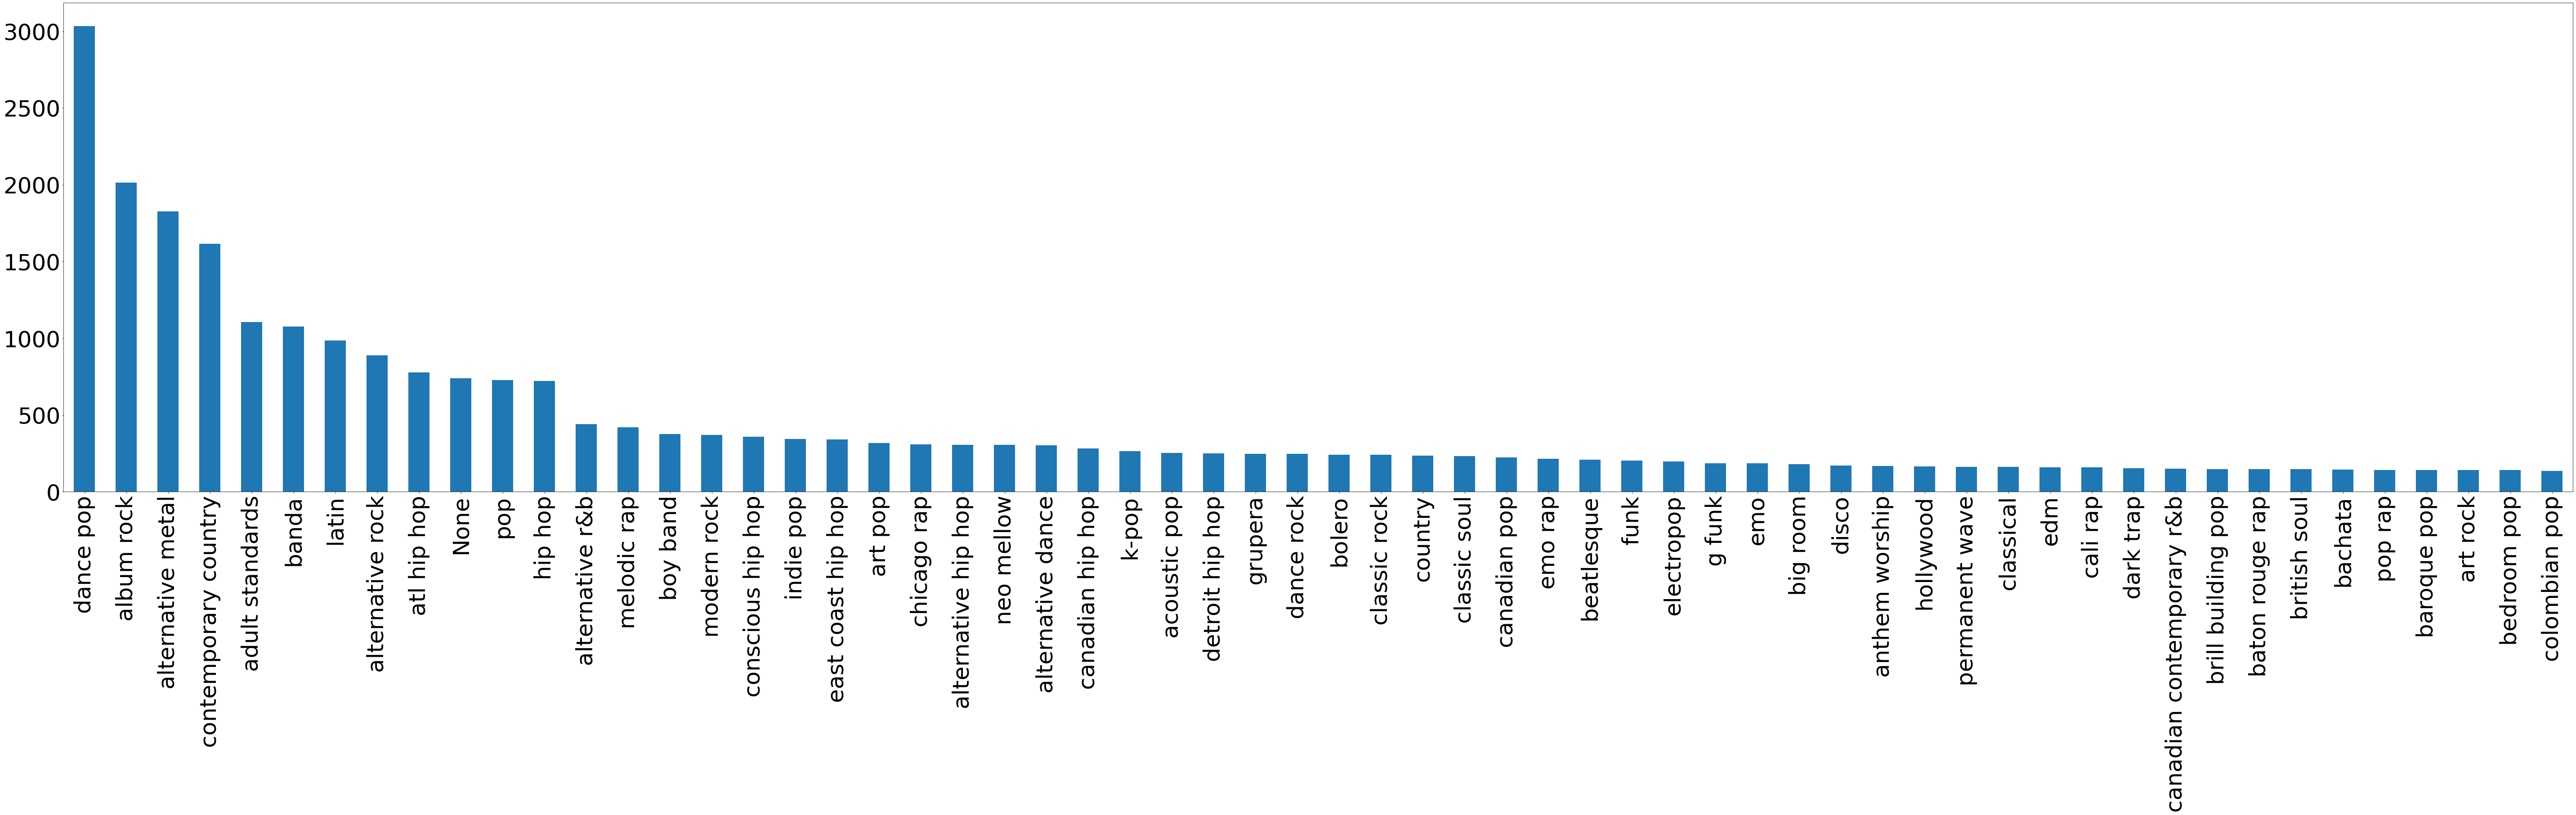

In [ ]:
music_and_genres_top50['first_genre'].value_counts().head(60).plot(kind='bar', figsize=(100,20), fontsize=50)



Here we can see the most popular genres which are "dance pop", "album rock", and "alternative metal". There are so many genres (922) in this dataset that I"m not sure how accurate it is. According to several internet sources there are over 1200 different music genres. In reality though, most of these are actually subgenres of the main original ones that most people know including 'Pop', 'Rock', 'Jazz', 'Rhythm and Blues', 'Classical' etc.

# Apply Dimensionality Reduction
Here two dimensionality reduction techniques have been used. The data was separated into text-based, and numerical. The text-based data was separated into artists and genres, each were encoded with dummy variables and then PCA was used to reduce the dimensionality of each to 2. The results of each the artist and genres PCA analyses were combined into a single dataframe with the numerical data (pca_music_df) and then UMAP was used to reduce this dataframe further to enable the results to be graphed. Several parameters were used and optimized (n_neighbors = 20 - other values that were tried were 10, 5, and 2) (min_dist = 0.0 = other values that were tried were 0.1, 0.3, and 0.5)

### Get dummy variables and run PCA on Artists

In [ ]:
one_hot_artists = pd.get_dummies(music_and_genres_top50['first_artist'], drop_first=True)
one_hot_artists.shape

(38480, 8612)

In [ ]:
pca_2dima = PCA(n_components=2)
one_hot_artists_pcaed = pca_2dima.fit_transform(one_hot_artists)
sum(pca_2dima.explained_variance_)

0.009703128567826343

In [ ]:
one_hot_artists_pcaed.shape

(38480, 2)

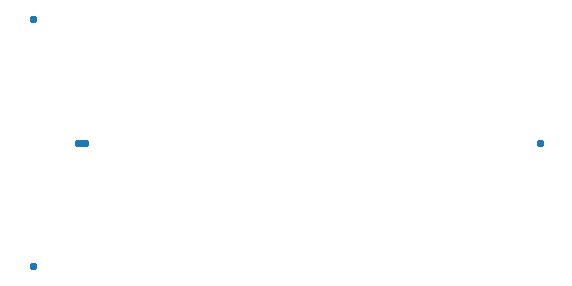

In [ ]:
#scatterplot of pcaed artist data
plt.figure(figsize=(10,5))
plt.scatter(one_hot_artists_pcaed[:,0],one_hot_artists_pcaed[:,1])
plt.yticks([])
plt.xticks([])
plt.axis('off')
plt.show()

### Get dummy variables and run PCA on Genres

In [ ]:
dummy_genres = pd.get_dummies(music_and_genres_top50['first_genre'], drop_first=True)
dummy_genres.shape

(38480, 921)

In [ ]:
pca_2dimb = PCA(n_components=2)
dummy_genres_pcaed = pca_2dimb.fit_transform(dummy_genres)
sum(pca_2dimb.explained_variance_ratio_)

0.13014053779233903

In [ ]:
dummy_genres_pcaed.shape

(38480, 2)

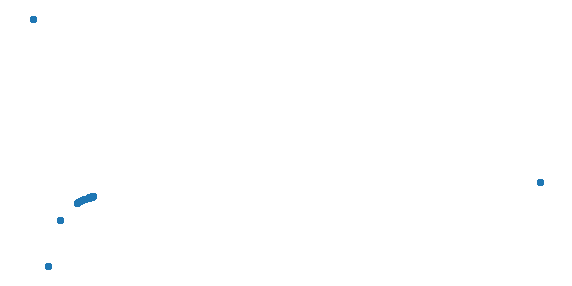

In [ ]:
#scatterplot of pcaed genre data
plt.figure(figsize=(10,5))
plt.scatter(dummy_genres_pcaed[:,0],dummy_genres_pcaed[:,1])
plt.yticks([])
plt.xticks([])
plt.axis('off')
plt.show()

The results of the PCA analyses are not very useful. The results do not explain very much of the variance so alot of information is lost. However, this is still the best dimensionality reduction method for the text based data because it is extremely fast. Most of the information is retained in the numerical data which will be reduced using UMAP below.

### Combine Results Into One DataFrame and Run UMAP

In [ ]:
music_and_genres_top50.columns

Index(['acousticness', 'artists_x', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'name', 'popularity', 'speechiness', 'tempo', 'valence', 'year',
       'artists_as_list', 'first_artist', 'artists_y', 'genres',
       'genres_as_list', 'first_genre'],
      dtype='object')

In [ ]:
music_and_genres_top50_numerical = music_and_genres_top50.drop(columns=['artists_x','name','artists_as_list','first_artist','artists_y','genres','first_genre','genres_as_list'])

In [ ]:
#put all pca results together in one data frame
pca_music_df=music_and_genres_top50_numerical.copy()

# pca_music_df['Numerical1']=scaled_music_pcaed[:,0]
# pca_music_df['Numerical2']=scaled_music_pcaed[:,1]
pca_music_df['Artists1']=one_hot_artists_pcaed[:,0]
pca_music_df['Artists2']=one_hot_artists_pcaed[:,1]
pca_music_df['Genres1']=dummy_genres_pcaed[:,0]
pca_music_df['Genres2']=dummy_genres_pcaed[:,1]
pca_music_df

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,Artists1,Artists2,Genres1,Genres2
139,0.9950,0.500,186840,0.0123,0,0.954000,5,0.0748,-30.170,1,58,0.0712,130.128,0.3130,1989,-0.003258,-3.797853e-07,-0.059447,-0.028287
2616,0.9920,0.261,286987,0.0149,0,0.897000,1,0.1020,-27.528,1,53,0.0419,75.296,0.0382,2005,-0.003600,-6.011583e-07,-0.059447,-0.028287
2617,0.9890,0.359,338253,0.0323,0,0.910000,1,0.0938,-24.408,1,53,0.0377,107.169,0.0728,2005,-0.003600,-6.011583e-07,-0.059447,-0.028287
2618,0.9910,0.314,199773,0.0157,0,0.916000,1,0.1340,-36.252,0,58,0.0356,95.890,0.0939,2012,-0.003600,-6.011582e-07,-0.059447,-0.028287
2662,0.9880,0.319,292547,0.0712,0,0.905000,1,0.1410,-26.415,1,51,0.0379,95.365,0.0835,2010,-0.003600,-6.011582e-07,-0.059447,-0.028287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169892,0.0490,0.753,159889,0.5030,0,0.000000,2,0.1500,-6.213,1,66,0.0406,136.892,0.6480,2020,-0.003275,-3.850891e-07,-0.056100,-0.025959
169893,0.0946,0.697,190955,0.9210,0,0.000019,5,0.1590,-4.283,1,81,0.0424,123.988,0.7220,2020,-0.003258,-3.797853e-07,-0.056238,-0.026052
169894,0.1390,0.816,148140,0.5770,0,0.000000,1,0.0827,-5.998,1,68,0.4100,171.028,0.4590,2020,-0.003258,-3.797853e-07,-0.059294,-0.028177
169895,0.0265,0.842,160952,0.7150,1,0.055400,2,0.0831,-6.030,1,65,0.0913,126.022,0.4280,2020,-0.003258,-3.797853e-07,-0.056258,-0.026066


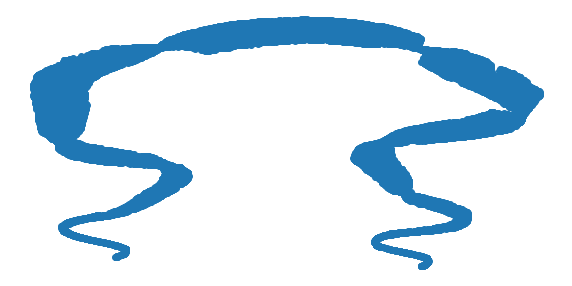

In [ ]:
#What about UMAP?
pca_music_umapped=umap.UMAP(n_neighbors=50,
                       n_components=2,
                       min_dist=0.0,
                       metric='correlation').fit_transform(pca_music_df)
plt.figure(figsize=(10,5))
plt.scatter(pca_music_umapped[:,0],pca_music_umapped[:,1])
plt.yticks([])
plt.xticks([])
plt.axis('off')
plt.show()

## K-Means
K-Means was used to group the 38,480 songs into different clusters to use for recommendations. I started with just a few clusters (5, 10, 20, etc) but with so many songs it was more benefical to have more and more groups to narrow down the recommendation lists. I ultimately decided on 4000 clusters despite silhouette scores because I had more groups of fewer songs which made it easier to sift through and get reasonable recommendations. Once I had the clusters, I added the cluster assignments to the model dataframe to use for song recommendation lists.

I decided to look up some songs and artists to see what they were grouped with. The example below is "You Raise Me Up" by Josh Groban. The genre listed for this song is operatic pop. It had 12 observations in this group. I knew some of the songs and listened to some I didn't know. I agreed with most of the recommendations. I've tried some other songs and the recommendations are really hit or miss.

In [ ]:
# no_of_clusters = [5,10,20,50,100, 200]
no_of_clusters = [2000,4000]
kmeans_clusters = []

for i in no_of_clusters:
  k_means = KMeans(n_clusters = i, random_state=123)
  kmeans_clusters.append(k_means.fit_predict(pca_music_df.drop(columns='popularity'), sample_weight=pca_music_df['popularity']))


In [ ]:
for i, solution in enumerate(kmeans_clusters):
  print('Silhoutte score for KMeans with {} clusters is: {}'.format(no_of_clusters[i],metrics.silhouette_score(pca_music_umapped, kmeans_clusters[i], metric='euclidean')))


Silhoutte score for KMeans with 2000 clusters is: -0.2689865529537201
Silhoutte score for KMeans with 4000 clusters is: -0.46407538652420044


In [ ]:
#add the cluster assignments to the cleaned dataframe
for i,v in enumerate(no_of_clusters):
  music_and_genres_top50['kmeans_' + str(v)] = kmeans_clusters[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pd.Series(kmeans_clusters[1]).value_counts()

240     41
322     39
1829    37
29      37
1754    35
        ..
142      1
1494     1
3383     1
2255     1
2854     1
Length: 4000, dtype: int64

In [ ]:
music_and_genres_top50

,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres,genres_as_list,first_genre,kmeans_2000,kmeans_4000
139,0.9950,"['Robert Schumann', 'Ivan Moravec']",0.500,186840,0.0123,0,0.954000,5,0.0748,-30.170,1,"Kinderszenen, Op. 15: No. 7 in F Major, Träumerei",58,0.0712,130.128,0.3130,1989,"[Robert Schumann, Ivan Moravec]",Robert Schumann,Robert Schumann,"['classical', 'early romantic era']","[classical, early romantic era]",classical,140,1306
2616,0.9920,"['Frédéric Chopin', 'Maurizio Pollini']",0.261,286987,0.0149,0,0.897000,1,0.1020,-27.528,1,"Nocturne No.1 In B Flat Minor, Op.9 No.1",53,0.0419,75.296,0.0382,2005,"[Frédéric Chopin, Maurizio Pollini]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical,1060,1821
2617,0.9890,"['Frédéric Chopin', 'Gabriela Montero']",0.359,338253,0.0323,0,0.910000,1,0.0938,-24.408,1,"Chopin: Nocturne No. 8 in D-Flat Major, Op. 27...",53,0.0377,107.169,0.0728,2005,"[Frédéric Chopin, Gabriela Montero]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical,419,679
2618,0.9910,"['Frédéric Chopin', 'Khatia Buniatishvili']",0.314,199773,0.0157,0,0.916000,1,0.1340,-36.252,0,"Waltz in C-Sharp Minor, Op. 64 No. 2",58,0.0356,95.890,0.0939,2012,"[Frédéric Chopin, Khatia Buniatishvili]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical,1692,3944
2662,0.9880,"['Frédéric Chopin', 'Hélène Grimaud']",0.319,292547,0.0712,0,0.905000,1,0.1410,-26.415,1,"Berceuse In D Flat, Op.57",51,0.0379,95.365,0.0835,2010,"[Frédéric Chopin, Hélène Grimaud]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical,487,1111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169892,0.0490,"['BRELAND', 'Sam Hunt']",0.753,159889,0.5030,0,0.000000,2,0.1500,-6.213,1,My Truck (feat. Sam Hunt) - Remix,66,0.0406,136.892,0.6480,2020,"[BRELAND, Sam Hunt]",BRELAND,BRELAND,['None'],[None],None,1581,3151
169893,0.0946,['Joel Corry'],0.697,190955,0.9210,0,0.000019,5,0.1590,-4.283,1,Lonely,81,0.0424,123.988,0.7220,2020,[Joel Corry],Joel Corry,Joel Corry,"['deep groove house', 'house', 'tropical house...","[deep groove house, house, tropical house, uk ...",deep groove house,1250,217
169894,0.1390,"['Savage Ga$p', '93FEETOFSMOKE', 'shinigami']",0.816,148140,0.5770,0,0.000000,1,0.0827,-5.998,1,Pumpkins Scream In the Dead of Night (feat. sh...,68,0.4100,171.028,0.4590,2020,"[Savage Ga$p, 93FEETOFSMOKE, shinigami]",Savage Ga$p,Savage Ga$p,"['dark trap', 'emo rap', 'meme rap']","[dark trap, emo rap, meme rap]",dark trap,799,1141
169895,0.0265,['Money Man'],0.842,160952,0.7150,1,0.055400,2,0.0831,-6.030,1,24,65,0.0913,126.022,0.4280,2020,[Money Man],Money Man,Money Man,"['atl trap', 'rap', 'southern hip hop', 'trap']","[atl trap, rap, southern hip hop, trap]",atl trap,374,1952


In [ ]:
music_and_genres_top50[music_and_genres_top50['first_artist'] == 'Josh Groban']

,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres,genres_as_list,first_genre,kmeans_2000,kmeans_4000
126784,0.9120,"['Josh Groban', 'Kelly Clarkson']",0.223,239453,0.268,0,0.000000,1,0.1080,-9.468,1,"All I Ask of You (from ""The Phantom of the Ope...",56,0.0304,90.971,0.1890,2015,"[Josh Groban, Kelly Clarkson]",Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1138,3794
126786,0.6730,['Josh Groban'],0.250,292333,0.136,0,0.000157,10,0.1070,-12.162,1,You Raise Me Up,58,0.0370,118.086,0.0981,2003,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1126,1635
126787,0.6510,['Josh Groban'],0.286,233893,0.322,0,0.000335,5,0.0994,-9.288,1,To Where You Are,55,0.0317,124.960,0.1090,2001,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1814,3358
126790,0.0284,['Josh Groban'],0.481,288946,0.712,0,0.205000,2,0.1080,-6.485,1,You Are Loved (Don't Give Up),52,0.0314,103.993,0.1220,2006,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1564,1209


In [ ]:
music_and_genres_top50[music_and_genres_top50['kmeans_4000']==1635]

,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres,genres_as_list,first_genre,kmeans_2000,kmeans_4000
70113,0.000128,['AC/DC'],0.493,292413,0.892,0,0.021800,4,0.2070,-5.601,1,Thunderstruck,63,0.0352,133.479,0.2300,2010,[AC/DC],AC/DC,AC/DC,"['album rock', 'australian rock', 'hard rock',...","[album rock, australian rock, hard rock, rock]",album rock,487,1635
71563,0.035100,['Triumph'],0.166,292400,0.655,0,0.000000,7,0.0827,-6.145,1,Magic Power,51,0.0346,152.792,0.4220,2010,[Triumph],Triumph,Triumph,"['album rock', 'canadian metal', 'classic cana...","[album rock, canadian metal, classic canadian ...",album rock,487,1635
79821,0.001240,['Red Hot Chili Peppers'],0.241,292400,0.824,0,0.000006,0,0.0955,-2.785,1,Savior,50,0.0479,83.663,0.2000,1999,[Red Hot Chili Peppers],Red Hot Chili Peppers,Red Hot Chili Peppers,"['alternative rock', 'funk metal', 'funk rock'...","[alternative rock, funk metal, funk rock, perm...",alternative rock,487,1635
80156,0.162000,['Whitney Houston'],0.806,292400,0.802,0,0.000885,1,0.0698,-7.076,1,It's Not Right But It's Okay,64,0.1020,127.931,0.5290,1998,[Whitney Houston],Whitney Houston,Whitney Houston,"['dance pop', 'pop', 'urban contemporary']","[dance pop, pop, urban contemporary]",dance pop,487,1635
99939,0.247000,['Annie Lennox'],0.767,292426,0.521,0,0.001240,9,0.3030,-9.145,1,Little Bird,52,0.0351,124.995,0.6720,1992,[Annie Lennox],Annie Lennox,Annie Lennox,"['europop', 'mellow gold', 'new wave pop', 'po...","[europop, mellow gold, new wave pop, pop rock,...",europop,487,1635
102519,0.192000,['The Killers'],0.500,292320,0.731,0,0.000450,10,0.1580,-4.535,1,Here With Me,59,0.0312,135.970,0.1120,2012,[The Killers],The Killers,The Killers,"['modern rock', 'permanent wave', 'rock']","[modern rock, permanent wave, rock]",modern rock,1126,1635
126786,0.673000,['Josh Groban'],0.250,292333,0.136,0,0.000157,10,0.1070,-12.162,1,You Raise Me Up,58,0.0370,118.086,0.0981,2003,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1126,1635
127964,0.480000,['Pedro Fernández'],0.860,292400,0.762,0,0.000013,4,0.0914,-4.440,1,Yo No Fui,52,0.0529,100.179,0.9030,2000,[Pedro Fernández],Pedro Fernández,Pedro Fernández,"['bolero', 'cumbia', 'grupera', 'latin', 'mari...","[bolero, cumbia, grupera, latin, mariachi, ran...",bolero,487,1635
138912,0.079900,['Akwid'],0.597,292413,0.594,0,0.000000,7,0.0938,-7.282,0,Anda Y Ve,59,0.3980,180.121,0.3700,2005,[Akwid],Akwid,Akwid,"['chicano rap', 'latin hip hop', 'mexican hip ...","[chicano rap, latin hip hop, mexican hip hop]",chicano rap,487,1635
139212,0.885000,['Regina Spektor'],0.217,292400,0.305,0,0.002710,1,0.2010,-9.495,1,Us,52,0.0321,82.848,0.1200,2004,[Regina Spektor],Regina Spektor,Regina Spektor,"['anti-folk', 'indie pop', 'lilith', 'piano ro...","[anti-folk, indie pop, lilith, piano rock, pop...",anti-folk,487,1635


## Mini Batch K-Means
Another modeling method I decided to use was Mini Batch K-Means. It is similar to K-Means but runs much quicker. Below it gave a much better silhouette score (0.2499) and only grouped the songs into 3833 clusters instead of 4000. Just like K-Means, I added the cluster assignments to the model dataframe and looked at the results. I used the same example: "You Raise Me Up" by Josh Groban. This time it only had 9 other tracks in the cluster. About half of the songs were the same, so I think this was a comparable result.

In [ ]:
minikmeans_cluster=MiniBatchKMeans(
    init='random',
    n_clusters=4000,
    batch_size=100)

minikmeans_cluster.fit(pca_music_df.drop(columns='popularity'))
mini_y_pred = minikmeans_cluster.predict(pca_music_df.drop(columns='popularity'), sample_weight=pca_music_df['popularity'])

print('Silhouette score for MiniBatchKMeans is: {}'.format(metrics.silhouette_score(pca_music_df,mini_y_pred,metric='euclidean')))

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=4000. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=4000. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=4000. Setting it to 3*k
  init_size=init_size)


Silhouette score for MiniBatchKMeans is: 0.24989112373405886


In [ ]:
pd.Series(mini_y_pred).value_counts()

2375    45
2415    45
663     44
2323    42
3798    39
        ..
2129     1
3459     1
2084     1
3622     1
166      1
Length: 3833, dtype: int64

In [ ]:
#add the cluster assignments to the cleaned dataframe
music_and_genres_top50['MiniBatchKMeans'] = mini_y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
music_and_genres_top50

,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres,genres_as_list,first_genre,kmeans_2000,kmeans_4000,MiniBatchKMeans
139,0.9950,"['Robert Schumann', 'Ivan Moravec']",0.500,186840,0.0123,0,0.954000,5,0.0748,-30.170,1,"Kinderszenen, Op. 15: No. 7 in F Major, Träumerei",58,0.0712,130.128,0.3130,1989,"[Robert Schumann, Ivan Moravec]",Robert Schumann,Robert Schumann,"['classical', 'early romantic era']","[classical, early romantic era]",classical,140,1306,3861
2616,0.9920,"['Frédéric Chopin', 'Maurizio Pollini']",0.261,286987,0.0149,0,0.897000,1,0.1020,-27.528,1,"Nocturne No.1 In B Flat Minor, Op.9 No.1",53,0.0419,75.296,0.0382,2005,"[Frédéric Chopin, Maurizio Pollini]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical,1060,1821,1677
2617,0.9890,"['Frédéric Chopin', 'Gabriela Montero']",0.359,338253,0.0323,0,0.910000,1,0.0938,-24.408,1,"Chopin: Nocturne No. 8 in D-Flat Major, Op. 27...",53,0.0377,107.169,0.0728,2005,"[Frédéric Chopin, Gabriela Montero]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical,419,679,1091
2618,0.9910,"['Frédéric Chopin', 'Khatia Buniatishvili']",0.314,199773,0.0157,0,0.916000,1,0.1340,-36.252,0,"Waltz in C-Sharp Minor, Op. 64 No. 2",58,0.0356,95.890,0.0939,2012,"[Frédéric Chopin, Khatia Buniatishvili]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical,1692,3944,476
2662,0.9880,"['Frédéric Chopin', 'Hélène Grimaud']",0.319,292547,0.0712,0,0.905000,1,0.1410,-26.415,1,"Berceuse In D Flat, Op.57",51,0.0379,95.365,0.0835,2010,"[Frédéric Chopin, Hélène Grimaud]",Frédéric Chopin,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...","[classical, early romantic era, polish classical]",classical,487,1111,882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169892,0.0490,"['BRELAND', 'Sam Hunt']",0.753,159889,0.5030,0,0.000000,2,0.1500,-6.213,1,My Truck (feat. Sam Hunt) - Remix,66,0.0406,136.892,0.6480,2020,"[BRELAND, Sam Hunt]",BRELAND,BRELAND,['None'],[None],None,1581,3151,2306
169893,0.0946,['Joel Corry'],0.697,190955,0.9210,0,0.000019,5,0.1590,-4.283,1,Lonely,81,0.0424,123.988,0.7220,2020,[Joel Corry],Joel Corry,Joel Corry,"['deep groove house', 'house', 'tropical house...","[deep groove house, house, tropical house, uk ...",deep groove house,1250,217,50
169894,0.1390,"['Savage Ga$p', '93FEETOFSMOKE', 'shinigami']",0.816,148140,0.5770,0,0.000000,1,0.0827,-5.998,1,Pumpkins Scream In the Dead of Night (feat. sh...,68,0.4100,171.028,0.4590,2020,"[Savage Ga$p, 93FEETOFSMOKE, shinigami]",Savage Ga$p,Savage Ga$p,"['dark trap', 'emo rap', 'meme rap']","[dark trap, emo rap, meme rap]",dark trap,799,1141,1127
169895,0.0265,['Money Man'],0.842,160952,0.7150,1,0.055400,2,0.0831,-6.030,1,24,65,0.0913,126.022,0.4280,2020,[Money Man],Money Man,Money Man,"['atl trap', 'rap', 'southern hip hop', 'trap']","[atl trap, rap, southern hip hop, trap]",atl trap,374,1952,2543


In [ ]:
music_and_genres_top50[music_and_genres_top50['first_artist'] == 'Josh Groban']

,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres,genres_as_list,first_genre,kmeans_2000,kmeans_4000,MiniBatchKMeans
126784,0.9120,"['Josh Groban', 'Kelly Clarkson']",0.223,239453,0.268,0,0.000000,1,0.1080,-9.468,1,"All I Ask of You (from ""The Phantom of the Ope...",56,0.0304,90.971,0.1890,2015,"[Josh Groban, Kelly Clarkson]",Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1138,3794,3214
126786,0.6730,['Josh Groban'],0.250,292333,0.136,0,0.000157,10,0.1070,-12.162,1,You Raise Me Up,58,0.0370,118.086,0.0981,2003,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1126,1635,145
126787,0.6510,['Josh Groban'],0.286,233893,0.322,0,0.000335,5,0.0994,-9.288,1,To Where You Are,55,0.0317,124.960,0.1090,2001,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1814,3358,2545
126790,0.0284,['Josh Groban'],0.481,288946,0.712,0,0.205000,2,0.1080,-6.485,1,You Are Loved (Don't Give Up),52,0.0314,103.993,0.1220,2006,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1564,1209,443


In [ ]:
music_and_genres_top50[music_and_genres_top50['MiniBatchKMeans']==145]

,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres,genres_as_list,first_genre,kmeans_2000,kmeans_4000,MiniBatchKMeans
52157,0.8150,['Caetano Veloso'],0.568,292307,0.458,0,0.000177,9,0.1090,-9.566,1,Voce E Linda - Remixed Original Album,59,0.0278,95.111,0.4490,1983,[Caetano Veloso],Caetano Veloso,Caetano Veloso,"['bossa nova', 'mpb', 'samba de roda']","[bossa nova, mpb, samba de roda]",bossa nova,1126,173,145
80800,0.0121,['Soda Stereo'],0.603,292267,0.929,0,0.002170,4,0.1310,-4.549,0,Persiana Americana - Remasterizado 2007,66,0.0407,101.208,0.5370,1986,[Soda Stereo],Soda Stereo,Soda Stereo,"['argentine rock', 'latin alternative', 'latin...","[argentine rock, latin alternative, latin rock...",argentine rock,1126,173,145
88822,0.0398,['Sheryl Crow'],0.717,292307,0.733,0,0.000000,4,0.1360,-4.985,1,Soak Up The Sun,60,0.0427,119.996,0.7130,2002,[Sheryl Crow],Sheryl Crow,Sheryl Crow,"['lilith', 'mellow gold', 'neo mellow', 'new w...","[lilith, mellow gold, neo mellow, new wave pop...",lilith,1126,173,145
100563,0.0407,"['Breaking Benjamin', 'Scooter Ward']",0.536,292281,0.803,0,0.000000,1,0.1110,-2.998,1,Far Away,62,0.0285,107.973,0.2540,2020,"[Breaking Benjamin, Scooter Ward]",Breaking Benjamin,Breaking Benjamin,"['alternative metal', 'nu metal', 'post-grunge']","[alternative metal, nu metal, post-grunge]",alternative metal,1126,173,145
102519,0.1920,['The Killers'],0.500,292320,0.731,0,0.000450,10,0.1580,-4.535,1,Here With Me,59,0.0312,135.970,0.1120,2012,[The Killers],The Killers,The Killers,"['modern rock', 'permanent wave', 'rock']","[modern rock, permanent wave, rock]",modern rock,1126,1635,145
126786,0.6730,['Josh Groban'],0.250,292333,0.136,0,0.000157,10,0.1070,-12.162,1,You Raise Me Up,58,0.0370,118.086,0.0981,2003,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1126,1635,145
140838,0.0203,['Blood Orange'],0.813,292373,0.406,0,0.392000,9,0.0757,-12.626,1,Champagne Coast,53,0.0662,122.658,0.7550,2011,[Blood Orange],Blood Orange,Blood Orange,"['alternative r&b', 'art pop', 'chillwave', 'e...","[alternative r&b, art pop, chillwave, electrop...",alternative r&b,1126,1635,145
149645,0.0576,"['Fergie', 'will.i.am']",0.906,292373,0.584,1,0.000000,8,0.1280,-7.720,0,Fergalicious,71,0.3160,129.055,0.8310,2006,"[Fergie, will.i.am]",Fergie,Fergie,"['dance pop', 'hip pop', 'pop', 'post-teen pop...","[dance pop, hip pop, pop, post-teen pop, urban...",dance pop,1126,1635,145
153572,0.0330,['Ariel Pink'],0.442,292276,0.836,0,0.001800,2,0.6210,-2.366,1,Dayzed Inn Daydreams,52,0.0322,140.008,0.6270,2014,[Ariel Pink],Ariel Pink,Ariel Pink,"['alternative dance', 'alternative rock', 'art...","[alternative dance, alternative rock, art pop,...",alternative dance,1126,173,145


## HDBSCAN
HDBSCAN was also tried for its speed and vast difference from K-Means and MiniBatch. It gave the best silhouette score of 0.4217, however, that is after dropping the observations that it labeled as 'noise'. The problem with this is that we lost over 13,000 tracks from the dataset. The results however, when I compared the recommendation lists to the other two methods, they were very consistant and contained mostly the same songs.

In [ ]:
from hdbscan import HDBSCAN

hdbscan_clusterer = HDBSCAN(min_cluster_size=2,
                            cluster_selection_method='leaf',
                            metric='euclidean')

In [ ]:
hdbscan_results = hdbscan_clusterer.fit_predict(pca_music_df)

In [ ]:
pca_music_df_with_hdbscan_results = pca_music_df.copy()
pca_music_df_with_hdbscan_results['hdbscan_results'] = hdbscan_results
pca_music_df_with_hdbscan_results['hdbscan_results'] = pca_music_df_with_hdbscan_results['hdbscan_results'].apply(lambda x: float('NaN') if x == -1 else x)
pca_music_df_with_hdbscan_results = pca_music_df_with_hdbscan_results.dropna(subset=['hdbscan_results'])

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_music_df_with_hdbscan_results.drop(columns=['hdbscan_results']), pca_music_df_with_hdbscan_results['hdbscan_results'] )

0.42172523133966744

In [ ]:
pd.Series(hdbscan_results).value_counts()

-1       13304
 1935       21
 4180       19
 5043       18
 5539       17
         ...  
 57          2
 3049        2
 1032        2
 3081        2
 3249        2
Length: 5957, dtype: int64

In [ ]:
#music_and_genres_top50['hdbscan_results'] = hdbscan_results
music_and_genres_top50[music_and_genres_top50['hdbscan_results']==1263]

,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres,genres_as_list,first_genre,kmeans_2000,kmeans_4000,MiniBatchKMeans,hdbscan_results
88822,0.0398,['Sheryl Crow'],0.717,292307,0.733,0,0.000000,4,0.136,-4.985,1,Soak Up The Sun,60,0.0427,119.996,0.7130,2002,[Sheryl Crow],Sheryl Crow,Sheryl Crow,"['lilith', 'mellow gold', 'neo mellow', 'new w...","[lilith, mellow gold, neo mellow, new wave pop...",lilith,1126,173,145,1263
102519,0.1920,['The Killers'],0.500,292320,0.731,0,0.000450,10,0.158,-4.535,1,Here With Me,59,0.0312,135.970,0.1120,2012,[The Killers],The Killers,The Killers,"['modern rock', 'permanent wave', 'rock']","[modern rock, permanent wave, rock]",modern rock,1126,1635,145,1263
126786,0.6730,['Josh Groban'],0.250,292333,0.136,0,0.000157,10,0.107,-12.162,1,You Raise Me Up,58,0.0370,118.086,0.0981,2003,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1126,1635,145,1263


# Results and Recommendations:
Based on the results of all three modeling techniques, the MiniBatchKMeans yielded best results. Even though the silhouette score wasn't as good as HDBSCAN, we didn't loose any data to 'noise.' This makes it more desirable.
As far as the recommendation lists go, this is just a simple model but the media streaming services out there have whole teams and departments working on this to improve music recommendations based on actions of the user and song feature analysis. I also find its really a matter of personal preference.

While looking at the results above, I wanted to add some user interface to actually give me a list of songs instead of hard coding it in. I wrote a function called song_finder that searches for the song in the DataFrame and returns the slice that contains it. Sometimes there are more than one songs with that name, such as in the case of covers. Then I find what cluster it is a part of and I return a random sample of 10 songs from that cluster. The most number of songs in any cluster is 41 or 45 so the recommendation lists are pretty managable. I used both results from K-Means and MiniBatch for comparison. I could've narrowed down the recommendation lists even more instead of doing a random sample but that is beyond the scope of this project.

Once I did this and was happy with the results, I decided to add the feature that would allow the user to get a recommendation list based on an artist as well as a song title. In this case, most of the time, there are multiple entries for artists and so I simply use the first song in the slice to retrieve the recommendation list. Again this can be improved but that is beyond the scope of this project.

For further study, I would try to improve upon the recommedations with further analysis instead of just taking the first observation in the slice or returning a random sample from the cluster.

In closing, this type of research is extremely important for so many aspects of our lives and has already been implemented. From song recommendations on Spotify, to movie recommendations on Netflix, advertisements popping up on websites based on our previous searches, Facebook, products on Amazon, the list goes on with no end in site. This type of research can be applied to nearly anything, with so many marketing applications. Trying to predict what people like or want has been a marketing focus for well over a century. It can always improve but will never be perfect.

In [ ]:
#These functions search the database for either a song or artist and returns
#a slice that contains the desired data
def song_finder(df, song_title):
  slice_with_songs = df[df['name'] == song_title]
  if (slice_with_songs.shape[0] == 0):
    return "No songs found"
  else:
    return slice_with_songs

def artist_finder(df, song_artist):
  slice_with_artists = df[df['first_artist'] == song_artist]
  if (slice_with_artists.shape[0]==0):
    return "No artists found"
  else:
    return slice_with_artists

In [ ]:
choice=input("Would you like recommendations on a song or artist? ")
if choice == 'song' or choice == 'Song' :
  song_title = input("What is your favorite song? ")
  data_slice=song_finder(music_and_genres_top50, song_title)

if choice == 'artist' or choice == 'Artist':
  chosen_artist = input("What is your favorite artist? ")
  data_slice = artist_finder(music_and_genres_top50,chosen_artist)

data_slice


Would you like recommendations on a song or artist? artist
What is your favorite artist? Josh Groban


,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres,genres_as_list,first_genre,kmeans_2000,kmeans_4000,MiniBatchKMeans
126784,0.9120,"['Josh Groban', 'Kelly Clarkson']",0.223,239453,0.268,0,0.000000,1,0.1080,-9.468,1,"All I Ask of You (from ""The Phantom of the Ope...",56,0.0304,90.971,0.1890,2015,"[Josh Groban, Kelly Clarkson]",Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1138,3794,3214
126786,0.6730,['Josh Groban'],0.250,292333,0.136,0,0.000157,10,0.1070,-12.162,1,You Raise Me Up,58,0.0370,118.086,0.0981,2003,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1126,1635,145
126787,0.6510,['Josh Groban'],0.286,233893,0.322,0,0.000335,5,0.0994,-9.288,1,To Where You Are,55,0.0317,124.960,0.1090,2001,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1814,3358,2545
126790,0.0284,['Josh Groban'],0.481,288946,0.712,0,0.205000,2,0.1080,-6.485,1,You Are Loved (Don't Give Up),52,0.0314,103.993,0.1220,2006,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1564,1209,443


In [ ]:

choice=input("Would you like recommendations on a song or artist? ")
if choice == 'song' or choice == 'Song' :
  song_title = input("What is your favorite song? ")
  data_slice=song_finder(music_and_genres_top50, song_title)

if choice == 'artist' or choice == 'Artist':
  chosen_artist = input("What is your favorite artist? ")
  data_slice = artist_finder(music_and_genres_top50,chosen_artist)

data_slice


Would you like recommendations on a song or artist? artist
What is your favorite artist? Josh Groban


,acousticness,artists_x,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,artists_as_list,first_artist,artists_y,genres,genres_as_list,first_genre,kmeans_2000,kmeans_4000,MiniBatchKMeans,hdbscan_results
126784,0.9120,"['Josh Groban', 'Kelly Clarkson']",0.223,239453,0.268,0,0.000000,1,0.1080,-9.468,1,"All I Ask of You (from ""The Phantom of the Ope...",56,0.0304,90.971,0.1890,2015,"[Josh Groban, Kelly Clarkson]",Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1138,3794,3214,4039
126786,0.6730,['Josh Groban'],0.250,292333,0.136,0,0.000157,10,0.1070,-12.162,1,You Raise Me Up,58,0.0370,118.086,0.0981,2003,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1126,1635,145,1263
126787,0.6510,['Josh Groban'],0.286,233893,0.322,0,0.000335,5,0.0994,-9.288,1,To Where You Are,55,0.0317,124.960,0.1090,2001,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1814,3358,2545,-1
126790,0.0284,['Josh Groban'],0.481,288946,0.712,0,0.205000,2,0.1080,-6.485,1,You Are Loved (Don't Give Up),52,0.0314,103.993,0.1220,2006,[Josh Groban],Josh Groban,Josh Groban,['operatic pop'],[operatic pop],operatic pop,1564,1209,443,1836


In [ ]:
#This produces recommendation lists based on the results of k_means with 4000 clusters
cluster_number=data_slice.iloc[1]['kmeans_4000']

print("Your choice is in cluster number {}. Here are your recommendations:".format(cluster_number))
cluster_results=music_and_genres_top50[music_and_genres_top50['kmeans_4000']==cluster_number]

recommendation_list=pd.DataFrame(data=cluster_results, columns=['name','first_artist','first_genre'])
recommendation_list = recommendation_list.rename(columns={'name':'Song Title', 'first_artist': 'Artist', 'first_genre':'Genre'})

recommendation_list

Your choice is in cluster number 1635. Here are your recommendations:


,Song Title,Artist,Genre
70113,Thunderstruck,AC/DC,album rock
71563,Magic Power,Triumph,album rock
79821,Savior,Red Hot Chili Peppers,alternative rock
80156,It's Not Right But It's Okay,Whitney Houston,dance pop
99939,Little Bird,Annie Lennox,europop
102519,Here With Me,The Killers,modern rock
126786,You Raise Me Up,Josh Groban,operatic pop
127964,Yo No Fui,Pedro Fernández,bolero
138912,Anda Y Ve,Akwid,chicano rap
139212,Us,Regina Spektor,anti-folk


In [ ]:
#This produces recommendation lists based on the results of MiniBatchKMeans
cluster_number=data_slice.iloc[1]['MiniBatchKMeans']

print("Your choice is in cluster number {}. Here are your recommendations:".format(cluster_number))
cluster_results=music_and_genres_top50[music_and_genres_top50['MiniBatchKMeans']==cluster_number]

recommendation_list=pd.DataFrame(data=cluster_results, columns=['name','first_artist','first_genre'])
recommendation_list = recommendation_list.rename(columns={'name':'Song Title', 'first_artist': 'Artist', 'first_genre':'Genre'})

recommendation_list

Your choice is in cluster number 145. Here are your recommendations:


,Song Title,Artist,Genre
52157,Voce E Linda - Remixed Original Album,Caetano Veloso,bossa nova
80800,Persiana Americana - Remasterizado 2007,Soda Stereo,argentine rock
88822,Soak Up The Sun,Sheryl Crow,lilith
100563,Far Away,Breaking Benjamin,alternative metal
102519,Here With Me,The Killers,modern rock
126786,You Raise Me Up,Josh Groban,operatic pop
140838,Champagne Coast,Blood Orange,alternative r&b
149645,Fergalicious,Fergie,dance pop
153572,Dayzed Inn Daydreams,Ariel Pink,alternative dance


In [ ]:
#This produces recommendation lists based on the results of MiniBatchKMeans
cluster_number=data_slice.iloc[1]['hdbscan_results']

print("Your choice is in cluster number {}. Here are your recommendations:".format(cluster_number))
cluster_results=music_and_genres_top50[music_and_genres_top50['hdbscan_results']==cluster_number]

recommendation_list=pd.DataFrame(data=cluster_results, columns=['name','first_artist','first_genre'])
recommendation_list = recommendation_list.rename(columns={'name':'Song Title', 'first_artist': 'Artist', 'first_genre':'Genre'})

recommendation_list

Your choice is in cluster number 1263. Here are your recommendations:


,Song Title,Artist,Genre
88822,Soak Up The Sun,Sheryl Crow,lilith
102519,Here With Me,The Killers,modern rock
126786,You Raise Me Up,Josh Groban,operatic pop
